# 4.5 統計モデルの設計

In [2]:
using Distributions
using PyPlot

In [3]:
function set_options(ax, xlabel, ylabel, title;
                     grid=true, gridy=false, legend=false)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if grid
        if gridy
            ax.grid(axis="y")
        else
            ax.grid()
        end
    end
    legend && ax.legend()
    return
end

set_options (generic function with 1 method)

## 4.5.3 線形回帰

In [4]:
# パラメータを生成するための分布
μ = [0.0, 0.0]
Σ = [0.1 0.0;
     0.0 0.1]

#　出力値に付加するノイズ
σ = 1.0

# 入力値はあらかじめ与えておく
X = [-10, -5, 0, 5, 10]

# サンプリングする回数
num_samples = 3

# パラメータのサンプル
W = rand(MvNormal(μ, Σ), num_samples)

# 出力値を保存するためのリスト
Ys = []

Any[]

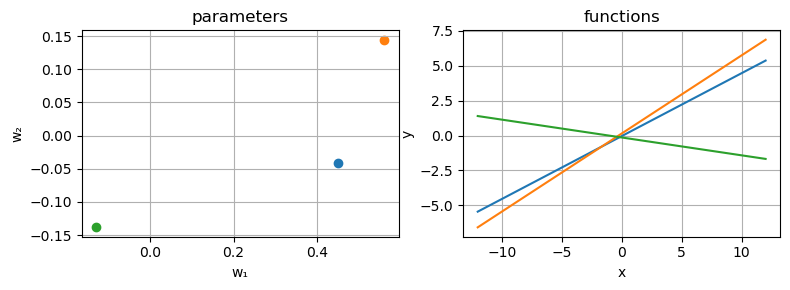

In [5]:
fig, axes = subplots(1, 2, figsize=(8,3))
xs = range(-12, 12, length=100)
for n in 1:num_samples
    w₁, w₂ = W[:, n]
    
    # パラメータをプロット
    axes[1].scatter(w₁, w₂)
    
    # 生成された関数をプロット
    f(x) = w₁*x + w₂
    axes[2].plot(xs, f.(xs))
    
    # 関数からの出力も生成する
    Y = rand.(Normal.(f.(X), σ))
    push!(Ys, Y)
end
    
set_options(axes[1], "w₁", "w₂", "parameters")
set_options(axes[2], "x", "y", "functions")
tight_layout()

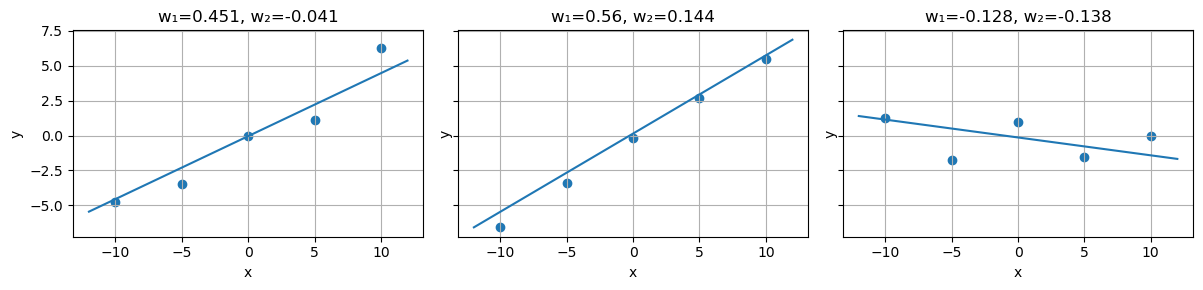

In [6]:
fig, axes = subplots(1, num_samples, sharey=true, figsize=(12,3))
for n in 1:num_samples
    w₁, w₂ = W[:, n]
    Y = Ys[n]
    f(x) = w₁*x + w₂
    axes[n].plot(xs, f.(xs))
    axes[n].scatter(X, Y)
    set_options(axes[n], "x", "y", "w₁=$(round(w₁, digits=3)), w₂=$(round(w₂, digits=3))")
end
tight_layout()